# Example Sheet 1

## Pre-Amble

In [318]:
import numpy as np
import math
import random
import scipy.integrate as integral
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from itertools import combinations_with_replacement
import time
import functools

## Question 4.1. and 4.2.

The Taylor Expansion of the sine function about zero of order 5 is given by:

$$ \sin(x) = x - \frac{1}{6}x^3 + \frac{1}{120}x^5$$

In [194]:
sin_approx = lambda x: x - x**3/6 + x**5/120
print("sin(0.1) is approximately: {:.5f}".format(sin_approx(0.1)))

sin(0.1) is approximately: 0.09983


## Question 4.3.

In [195]:
def find_primes(N):
    primes = list(range(2, N+1))
    for n in range(2, N+1):
        for p in primes:
            if p % n == 0 and p!= n:
                primes.remove(p)
    return primes

In [196]:
find_primes(10)

[2, 3, 5, 7]

## Question 4.4.

In [197]:
def generate_recaman(N):
    sequence = [1]
    for n in range(2, N+1):
        low_value = sequence[-1] - n
        if low_value in sequence or low_value <= 0 :
            sequence.append(low_value + 2*n)
        else:
            sequence.append(low_value)
    return sequence

In [198]:
generate_recaman(10)

[1, 3, 6, 2, 7, 13, 20, 12, 21, 11]

## Question 4.5.

In [199]:
def find_common_terms(N):
    primes = set(find_primes(N))
    recaman = set(generate_recaman(N))
    return list(primes.intersection(recaman))

In [200]:
find_common_terms(10)

[2, 3, 7]

## Question 4.6.

In [201]:
num_to_factorise = 362880
[(x, num_to_factorise // x) for x in range(1, math.ceil(math.sqrt(num_to_factorise)) + 1) if num_to_factorise % x==0]

[(1, 362880),
 (2, 181440),
 (3, 120960),
 (4, 90720),
 (5, 72576),
 (6, 60480),
 (7, 51840),
 (8, 45360),
 (9, 40320),
 (10, 36288),
 (12, 30240),
 (14, 25920),
 (15, 24192),
 (16, 22680),
 (18, 20160),
 (20, 18144),
 (21, 17280),
 (24, 15120),
 (27, 13440),
 (28, 12960),
 (30, 12096),
 (32, 11340),
 (35, 10368),
 (36, 10080),
 (40, 9072),
 (42, 8640),
 (45, 8064),
 (48, 7560),
 (54, 6720),
 (56, 6480),
 (60, 6048),
 (63, 5760),
 (64, 5670),
 (70, 5184),
 (72, 5040),
 (80, 4536),
 (81, 4480),
 (84, 4320),
 (90, 4032),
 (96, 3780),
 (105, 3456),
 (108, 3360),
 (112, 3240),
 (120, 3024),
 (126, 2880),
 (128, 2835),
 (135, 2688),
 (140, 2592),
 (144, 2520),
 (160, 2268),
 (162, 2240),
 (168, 2160),
 (180, 2016),
 (189, 1920),
 (192, 1890),
 (210, 1728),
 (216, 1680),
 (224, 1620),
 (240, 1512),
 (252, 1440),
 (270, 1344),
 (280, 1296),
 (288, 1260),
 (315, 1152),
 (320, 1134),
 (324, 1120),
 (336, 1080),
 (360, 1008),
 (378, 960),
 (384, 945),
 (405, 896),
 (420, 864),
 (432, 840),
 (448

## Question 4.7.

In [202]:
def random_walk():
    location = 0
    while abs(location) < 4:
        yield location
        location += random.randint(-1,1)
    yield location

for step in random_walk():
    print(step)

0
1
1
2
1
1
0
-1
-1
0
0
-1
-1
0
-1
-2
-3
-3
-4


## Question 5.1.

In [203]:
@np.vectorize
def monomial_product(pow):
    return integral.quad(lambda x: (x**pow) * np.sin(np.log1p(x)), 0, 1)

In [233]:
monomial_powers = np.arange(6) + np.arange(6).reshape(-1,1)
M = monomial_product(np.arange(6) + np.arange(6).reshape(-1,1))[0]
print("M is computed as:\n", M)

M is computed as:
 [[0.36972237 0.23722455 0.17394447 0.13710581 0.1130647  0.09616204]
 [0.23722455 0.17394447 0.13710581 0.1130647  0.09616204 0.0836387 ]
 [0.17394447 0.13710581 0.1130647  0.09616204 0.0836387  0.07399217]
 [0.13710581 0.1130647  0.09616204 0.0836387  0.07399217 0.06633541]
 [0.1130647  0.09616204 0.0836387  0.07399217 0.06633541 0.06011148]
 [0.09616204 0.0836387  0.07399217 0.06633541 0.06011148 0.05495326]]


In [323]:
coefs_matrix = np.linalg.inv(np.linalg.cholesky(M))
print("Lambda matrix:\n",coefs_matrix)

Lambda matrix:
 [[ 1.64460699e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.35221622e+00  6.78307428e+00 -1.46335442e-15 -9.10400742e-16
   4.97174831e-16  4.04843593e-17]
 [ 7.78361074e+00 -3.23507993e+01  2.75756308e+01  4.34201225e-15
  -2.37119667e-15 -1.93083744e-16]
 [-1.18172980e+01  9.17517877e+01 -1.87731150e+02  1.11287328e+02
   1.02852156e-14 -1.29694545e-15]
 [ 1.63748194e+01 -2.02659391e+02  7.24942769e+02 -9.82376045e+02
   4.47631499e+02  3.49309011e-14]
 [-2.14019465e+01  3.85031445e+02 -2.09607563e+03  4.79138902e+03
  -4.85198630e+03  1.79733849e+03]]


In [235]:
def polynomial_basis(idx, coefs):
    return np.vectorize(lambda x: np.dot(coefs[idx,:], x**np.arange(6)) )

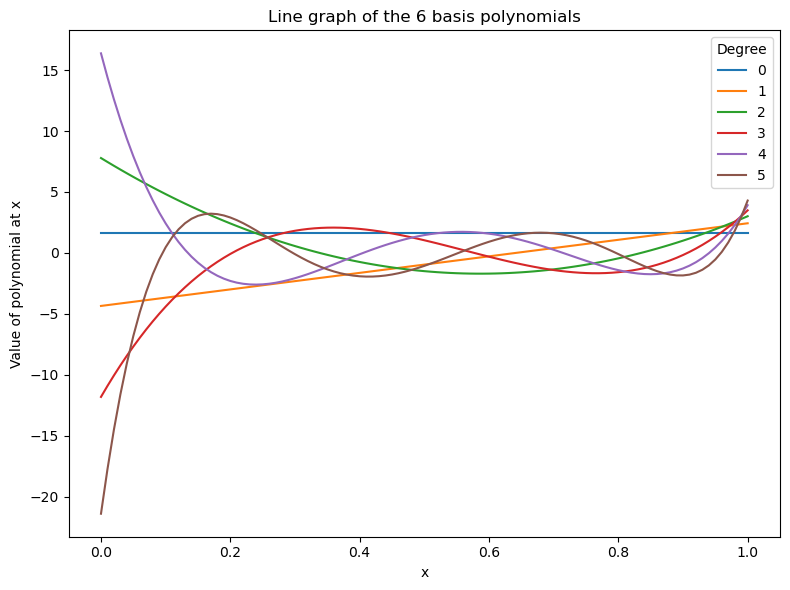

In [327]:
x_plot = np.linspace(0,1,101)
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
for idx in range(6):
    ax.plot(x_plot, polynomial_basis(idx, coefs_matrix)(x_plot), label=idx)
ax.legend(title="Degree")
ax.set(xlabel="x", ylabel="Value of polynomial at x", title="Line graph of the 6 basis polynomials")
plt.tight_layout()

In [328]:
for idx_pair in combinations_with_replacement(range(6), 2):
    product = integral.quad(lambda x: polynomial_basis(idx_pair[0], coefs_matrix)(x) * polynomial_basis(idx_pair[1], coefs_matrix)(x) * np.sin(np.log1p(x)), 0, 1)
    print("Indices of basis functions: {}      Product: {:>10.2e} +- {:.2e}".format(idx_pair, product[0], product[1]))

Indices of basis functions: (0, 0)      Product:   1.00e+00 +- 1.11e-14
Indices of basis functions: (0, 1)      Product:  -7.08e-16 +- 9.34e-15
Indices of basis functions: (0, 2)      Product:   1.44e-15 +- 9.08e-15
Indices of basis functions: (0, 3)      Product:   3.82e-15 +- 9.00e-15
Indices of basis functions: (0, 4)      Product:  -5.81e-14 +- 8.94e-15
Indices of basis functions: (0, 5)      Product:   3.25e-13 +- 9.05e-15
Indices of basis functions: (1, 1)      Product:   1.00e+00 +- 1.11e-14
Indices of basis functions: (1, 2)      Product:  -2.86e-15 +- 8.97e-15
Indices of basis functions: (1, 3)      Product:  -5.51e-15 +- 9.27e-15
Indices of basis functions: (1, 4)      Product:   1.20e-13 +- 9.15e-15
Indices of basis functions: (1, 5)      Product:  -7.77e-13 +- 1.35e-13
Indices of basis functions: (2, 2)      Product:   1.00e+00 +- 1.11e-14
Indices of basis functions: (2, 3)      Product:   1.39e-13 +- 9.66e-15
Indices of basis functions: (2, 4)      Product:  -9.30e-13 +- 1

## Question 5.2.

In [329]:
def arc_length_2(width, x):
    y = np.zeros(201)
    y[np.abs(x) < width] = np.sqrt(width**2 - x[np.abs(x) < width]**2)
    return y

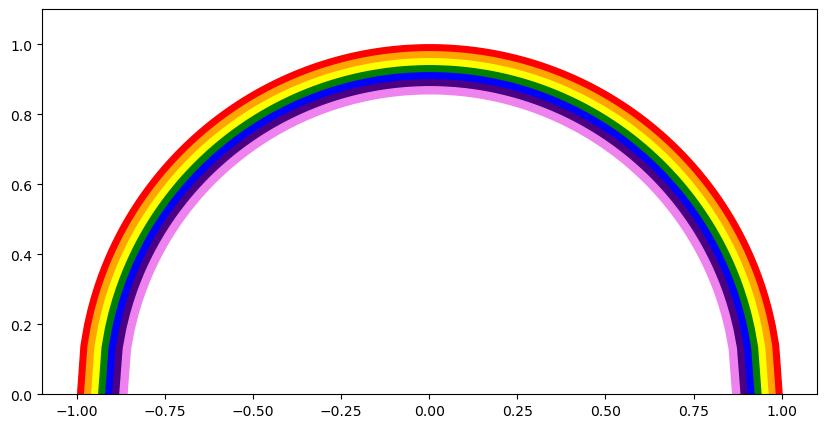

In [330]:
x_plot = np.linspace(-1,1,201)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
for idx, colour in enumerate(["red", "orange", "yellow", "green", "blue", "indigo", "violet"]): 
    ax.fill_between(x_plot, arc_length_2(1 - idx*0.02, x_plot), arc_length_2(0.98 - idx*0.02, x_plot), color=colour)
ax.set(ylim=(0,1.1))
plt.show()

## Question 5.3.

In [331]:
mean = np.array([1,2])
covariance = np.array([[1,2],[2,5]])

data_arr = np.random.multivariate_normal(mean, covariance, 5000)

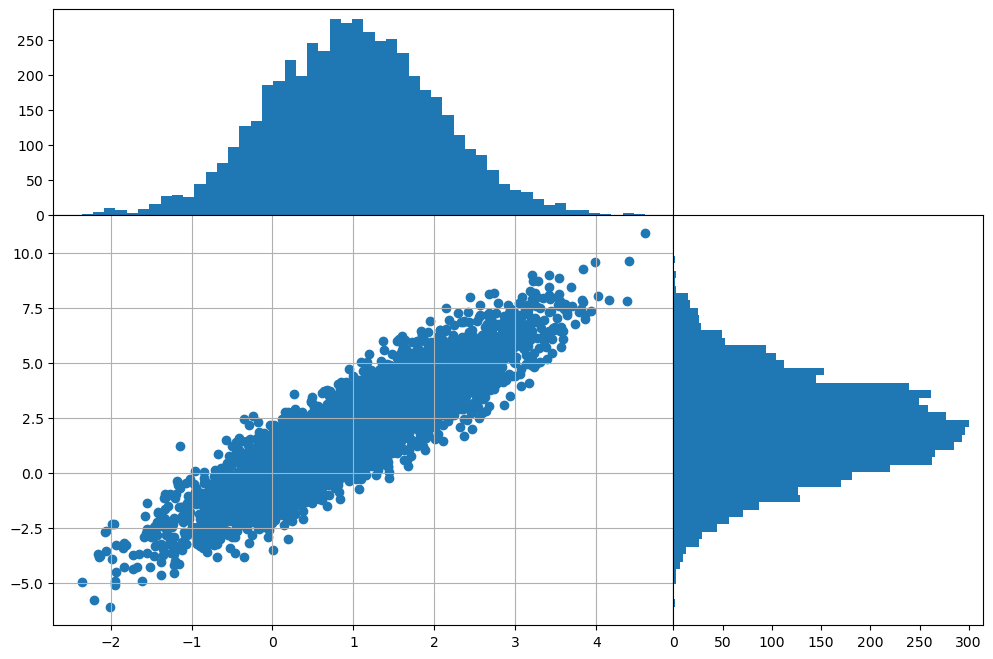

In [332]:
fig = plt.figure(figsize=(12,8))
grid = gs.GridSpec(2, 2, wspace=0, hspace=0, width_ratios=[2,1], height_ratios=[1,2])
x=np.linspace(0,1,101)

ax1 = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[1,0])
ax3 = plt.subplot(grid[1,1])

ax2.grid(True)
ax2.scatter(data_arr[:,0], data_arr[:,1])
ax1.hist(data_arr[:,0], bins=50)
ax3.hist(data_arr[:,1], bins=50, orientation="horizontal")

ax3.set(yticks=[])

plt.show()

In [333]:
class Fraction:
    """Fraction Class"""
    def __init__(self, num, den):
        if den > 0:
            self.num = num
            self.den = den
        else:
            self.num = - num
            self.den = - den
    def __str__(self):
        return "Fraction of value {}/{}".format(self.num, self.den)
    def __add__(self, other):
        return Fraction(self.num * other.den + self.den * other.num, self.den * other.den)
    def __sub__(self, other):
        return Fraction(self.num * other.den - self.den * other.num, self.den * other.den)
    def __mul__(self, other):
        return Fraction(self.num * other.num, self.den * other.den)
    def __truediv__(self, other):
        return Fraction(self.num * other.den, self.den * other.num)
    def __lt__(self, other):
        return self.num * other.den < self.den * other.num
    def __gt__(self, other):
        return self.num * other.den > self.den * other.num
    def __eq__(self, other):
        self.num * other.den == self.den * other.num
    def reduce(self):
        div = 2
        while div <= min(abs(self.num), self.den):
            if abs(self.num) % div == 0 and self.den % div == 0:
                self.num //= div
                self.den //= div
                div = 2
            else:
                div +=1
        print("Reduced to", self)

In [334]:
a = Fraction(64,24)

In [335]:
(a + Fraction(7,8)).reduce()

Reduced to Fraction of value 85/24


In [336]:
Fraction(17,18) < Fraction(19,20)

True

## Question 5.4.

In [337]:
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        value = func(*args, **kwargs)
        end = time.time()
        print("Function took {:.3f}s to call.".format(end - start))
        return value
    return wrapper

In [338]:
@timer
def generate_recaman2(N):
    sequence = [1]
    for n in range(2, N+1):
        low_value = sequence[-1] - n
        if low_value in sequence or low_value <= 0 :
            sequence.append(low_value + 2*n)
        else:
            sequence.append(low_value)
    return sequence

seq = generate_recaman2(10000)

Function took 0.334s to call.
